# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Predictions Infox - Comparaison Bag of Words

---

### Conseils JW
- Utiliser la courbe de ROC : superposition, et calcul de l'intégrale Area under curve = AUC
- Faire varier le seuil pour accuracy/recall/f1. La courbe de ROC résume tout ça.
- Essayer Naive Bayes avec distribution de Poisson
- Refaire un benchmark
- Faire des opérations de réduction de dimensions SVD sur le BoW `sklearn.decomposition.TruncatedSVD`
- Réseau de neurones : faire petit, metrique AUC
- Word Embedings : https://fasttext.cc/docs/en/crawl-vectors.html


# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

## Paramètres globaux

In [3]:
random_state = 42

## Données d'entrainement

In [4]:
df_texts_recueil = pd.read_csv('data/demo/221123-TextInfox.csv')

In [6]:
df_texts_recueil

,url,infox,title,article,text
0,https://actu.fr/faits-divers/quatre-morts-dans...,0.0,Quatre morts dans un accident de la route sur ...,"Quatre personnes sont décédées, et une autre a...",Quatre morts dans un accident de la route sur ...
1,https://www.francetvinfo.fr/economie/budget/co...,0.0,Consommation : les Français boudent les distri...,Les distributeurs de billets vont-ils un jour ...,Consommation : les Français boudent les distri...
2,https://www.francetvinfo.fr/sante/contraceptio...,0.0,Avortement : le choix des Irlandais,"En Irlande, lors du référendum, les électeurs ...",Avortement : le choix des Irlandais\nEn Irland...
3,https://www.francesoir.fr/culture-celebrites/u...,0.0,Une ex de Cristiano Ronaldo compare porno et t...,Elle avait mis un pied dans le monde de la tél...,Une ex de Cristiano Ronaldo compare porno et t...
4,https://www.francesoir.fr/afp-afp-france/levee...,0.0,"Levée du statut de détenu signalé de Colonna, ...",Le Premier ministre Jean Castex a levé mardi l...,"Levée du statut de détenu signalé de Colonna, ..."
...,...,...,...,...,...
606,https://www.wikistrike.com/2022/09/11-septembr...,1.0,11 septembre 2001 : La théorie du « complot pi...,Le 11 septembre pour les nuls\nEst-il vrai que...,11 septembre 2001 : La théorie du « complot pi...
607,https://www.wikistrike.com/2022/10/selon-un-an...,1.0,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...","Selon un ancien conseiller du Pentagone, les É..."
608,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,La Pologne s’apprête à s’emparer du territoire...
609,https://www.wikistrike.com/2022/11/exclusivite...,1.0,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",Exclusivité WikiStrike: un physicien en colère...


In [7]:
df_texts_afp =  pd.read_csv('data/tmp/221118-TextsAfp.csv')

In [8]:
df_texts_afp

,url,text,infox
0,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,0.0
1,https://www.francesoir.fr/politique-france/la-...,La France lance un plan de sobriété énergétiqu...,0.0
2,https://www.francesoir.fr/politique-monde/mani...,Manifestations des femmes en Iran contre le po...,0.0
3,https://www.francesoir.fr/politique-france/aff...,Affaire Quatennens: LFI sous la pression de la...,0.0
4,https://www.francesoir.fr/politique-monde/covi...,"Covid-19: pour Joe Biden, ""la pandémie est ter...",0.0
...,...,...,...
3232,https://www.francesoir.fr/lifestyle-gastronomi...,La deuxième vie des coquilles d'huîtres\nLes h...,0.0
3233,https://www.francesoir.fr/lifestyle-gastronomi...,La truffe se fait rare\nVictime du réchauffeme...,0.0
3234,https://www.francesoir.fr/lifestyle-gastronomi...,Rungis prépare un Noël opulent malgré les atte...,0.0
3235,https://www.francesoir.fr/lifestyle-gastronomi...,Gastronomie: le Franco-Suisse Benoît Violier m...,0.0


In [9]:
with open('data/tmp/221110-IgnoreLemmas.txt','r') as file:
    ignore_words = file.read().split()

In [10]:
print(ignore_words[:100])
print(len(ignore_words))

['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'est', 'une', 'que', 'être', 'avoir', 'pour', 'dans', 'qui', 'il', 'par', 'sur', 'au', 'pas', 'ce', 'plaire', 'faire', 'ne', 'qu', 'pouvoir', 'se', 'avec', 'tout', 'ou', 'été', 'son', 'mais', 'aux', 'cette', 'on', 'nous', 'comme', 'elle', 'même', 'autre', 'devoir', 'ces', 'pays', 'leur', 'si', 'sa', 'ses', 'bien', 'état', 'contre', 'ils', 'vous', 'sans', 'voir', 'je', 'après', 'deux', 'depuis', 'mettre', 'russie', 'monde', 'entre', 'grand', 'an', 'dire', 'covid', 'invitant', 'guéguen', 'patiemment', 'méditation', 'eda', 'perdurer', 'inversement', 'guedj', 'penn', 'kang', 'officieux', 'jurisprudence', 'kant', 'hectare', 'islamisation', 'hebdo', 'guichard', 'entente', 'guihard', 'pepe', 'duel', 'haïr', 'naufrage', 'ironiquement', 'olivennes', 'juvénile', 'inégal', 'patois', 'justifiant', 'echos', 'jacky']
15203


In [11]:
df_words = pd.read_csv('data/prod/221125-InfoxWords.csv')

In [12]:
df_words

,Unnamed: 0,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
0,de,114412,23980,138392,False,False,False,False,False,False,False,True,True,True,True,True
1,la,63402,12901,76303,False,False,False,False,False,False,False,True,True,True,True,True
2,le,49361,9921,59282,False,False,False,False,False,False,False,True,True,True,True,True
3,et,38704,10142,48846,False,False,False,False,False,False,False,True,True,True,True,True
4,les,38053,10363,48416,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54204,mayr,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
54205,mazari,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
54206,maçonnique,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False
54207,maïté,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False


In [13]:
ignore_words_small = list(df_words[df_words['rare_1']].index) + list(df_words[df_words['common_80']].index)
ignore_words_medium = list(df_words[df_words['rare_2']].index) + list(df_words[df_words['common_80']].index)
ignore_words_large = list(df_words[df_words['rare_5']].index) + list(df_words[df_words['common_200']].index)

In [14]:
common_80 = list(df_words[df_words['common_80']].index)
common_200 = list(df_words[df_words['common_200']].index)

In [15]:
len(ignore_words)

15203

# Experience
---

## Pipeline

### Preprocessor

In [16]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.preprocess
#preprocessor=None

### Tokenizer

In [17]:
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text

### TfIdfVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
#afp_size = 3000
#afp_size = 120
afp_size = 20
#afp_size = 0
df_ml = pd.concat([df_texts_recueil,df_texts_afp.sample(afp_size,random_state=random_state)])

In [21]:
%%time
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words)
#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words_small)
count_matrix = vectorizer.fit_transform(df_ml['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf

len(df_X.keys())

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'ambitieux', 'anlaşmas', 'boeuf', 'bouillir', 'bursal', 'choeur', 'coeur', 'coordonner', 'croire', 'décombrer', 'démoraliser', 'déplaire', 'désoeuvrer', 'désordonner', 'florir', 'foetal', 'joindre', 'km', 'lacağ', 'liman', 'manoeuvre', 'matcher', 'maudire', 'menacer', 'mol', 'noeud', 'oeuf', 'oxygéner', 'personnaliser', 'presser', 'précieux', 'présumer', 'recroître', 'saisir', 'sald', 'satisfaire', 'sevkiyat', 'soeur', 'subventionner', 'tah', 'teindre', 'tracter', 'voeu', 'yap', 'yla', 'émerger', 'énoncer', 'équivaloir'] not in stop_words.
  warnings.warn(


CPU times: user 485 ms, sys: 16.2 ms, total: 501 ms
Wall time: 506 ms


13899

## Entrainement sklearn

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [23]:
X = df_X
y=df_ml['infox']

In [24]:
df_X.shape

(631, 13899)

### Initialisations

In [26]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

In [27]:
def print_metrics(y_train, y_test, y_pred):
    print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
    print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
    print(f'Accuracy score \t{metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Recall score \t{metrics.recall_score(y_test, y_pred)*100:.2f}%')
    print(f'F1 score \t{metrics.f1_score(y_test, y_pred)*100:.2f}%')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred,normalize='all')
    print(f'False Positive \t{cnf_matrix[0,1]*100:.2f}%')
    print(f'False Negative \t{cnf_matrix[1,0]*100:.2f}%\n')    

### Dummy Classifier

In [28]:
from sklearn.dummy import DummyClassifier
#strategies = ['most_frequent', 'prior', 'stratified', 'uniform']
strategies = ['stratified', 'uniform']
for strategy in strategies:
    print('---------------')
    print(f'Strategy : {strategy}\n')
    classifier = DummyClassifier(strategy=strategy, random_state=random_state)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print_metrics(y_train, y_test, y_pred)

---------------
Strategy : stratified

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	38.58%
Recall score 	33.33%
F1 score 	32.76%
False Positive 	31.50%
False Negative 	29.92%

---------------
Strategy : uniform

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	45.67%
Recall score 	54.39%
F1 score 	47.33%
False Positive 	33.86%
False Negative 	20.47%



### Confusion Matrix
||Pred 0|Pred 1|
|---|---|---|
|**Test 0**|True Negative|False Positive|
|**Test 1**|False Negative|True Positive|

### LogisticRegression

In [29]:
max_iter=500
#C=0.40
C=100
solver = 'lbfgs'

In [30]:
%%time
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
print()
print_metrics(y_train, y_test, y_pred)

LogisticRegression(C=100, max_iter=500, random_state=42)

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	76.38%
Recall score 	75.44%
F1 score 	74.14%
False Positive 	12.60%
False Negative 	11.02%

CPU times: user 2.75 s, sys: 2.35 s, total: 5.1 s
Wall time: 694 ms


In [31]:
# Cross validation
max_iter=500
#C=0.40
C=1000
solver = 'lbfgs'
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
scores = cross_val_score(classifier, X, y, cv=5,scoring='f1')
print(scores)
print(f'Mean Score : {scores.mean()*100:.2f}%')
print(f'Deviation Score : {scores.std()*100:.2f}%')


[0.76422764 0.6875     0.8030303  0.53211009 0.74074074]
Mean Score : 70.55%
Deviation Score : 9.44%


### MLPClassifier

In [124]:
alpha=1e-4
hidden_layer_sizes=(8,8)
solver = 'adam'
solvers = ['lbfgs', 'sgd', 'adam']


In [126]:
%%time

classifier = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
print()
print_metrics(y_train, y_test, y_pred)

MLPClassifier(hidden_layer_sizes=(8, 8), random_state=42)

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	81.89%
Recall score 	85.96%
F1 score 	80.99%
False Positive 	11.81%
False Negative 	6.30%

CPU times: user 30.4 s, sys: 13.1 s, total: 43.6 s
Wall time: 5.44 s


## Keras

In [115]:
import tensorflow as tf
tf.keras.utils.set_random_seed(random_state)

In [116]:
learn_size=0.90
X_learn,X_valid,y_learn,y_valid = train_test_split(X_train,y_train,random_state=random_state,train_size=learn_size)

In [117]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),    
    layers.GaussianDropout(0.40, seed=random_state),
    layers.Dense(1, activation='sigmoid'),
])

In [118]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(X.shape[1]),    
    layers.Dropout(0.40, seed=random_state),
    layers.Dense(8, activation='relu'),
#    layers.Dense(8, activation='relu'),    
    layers.Dropout(0.40, seed=random_state),
#    layers.Dense(8, activation='relu'),
#    layers.Dropout(0.40, seed=random_state),
    layers.Dense(1, activation='sigmoid'),
])

In [119]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
#    metrics=['binary_accuracy'],
    metrics=[tf.keras.metrics.AUC()],
    
)

In [120]:
%%time
epoch = 10

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(
#    X_train.to_numpy(), y_train.to_numpy(),
#    validation_split=0.2,
    X_learn.to_numpy(), y_learn.to_numpy(),
    validation_data=(X_valid.to_numpy(), y_valid.to_numpy()),
    batch_size=24,
    epochs=epoch,
#    callbacks=[early_stopping],
    shuffle=True,
)

Epoch 1/10
 1/19 [>.............................] - ETA: 7s - loss: 0.6971 - auc_3: 0.3392

2022-11-25 14:55:28.982143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 32ms/step - loss: 0.6912 - auc_3: 0.5630 - val_loss: 0.6905 - val_auc_3: 0.6623
Epoch 2/10
 1/19 [>.............................] - ETA: 0s - loss: 0.6793 - auc_3: 0.8222

2022-11-25 14:55:29.602774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 14ms/step - loss: 0.6721 - auc_3: 0.8726 - val_loss: 0.6823 - val_auc_3: 0.7337
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.6453 - auc_3: 0.9052 - val_loss: 0.6739 - val_auc_3: 0.7430
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 0.6052 - auc_3: 0.9604 - val_loss: 0.6650 - val_auc_3: 0.7391
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.5706 - auc_3: 0.9680 - val_loss: 0.6556 - val_auc_3: 0.7570
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.5386 - auc_3: 0.9659 - val_loss: 0.6470 - val_auc_3: 0.7578
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.4987 - auc_3: 0.9780 - val_loss: 0.6398 - val_auc_3: 0.7585
Epoch 8/10
19/19 [==============================] - 0s 12ms/step - loss: 0.4643 - auc_3: 0.9851 - val_loss: 0.6338 - val_auc_3: 0.7624
Epoch 9/10
19/19 [==============================] - 0s 12ms/step -

KeyError: "None of [Index(['auc_1', 'val_auc_1'], dtype='object')] are in the [columns]"

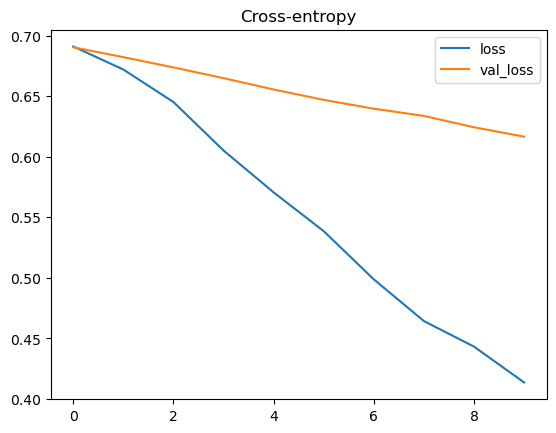

In [121]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['auc_1', 'val_auc_1']].plot(title="AUC")#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")








In [122]:
history_df

,loss,auc_3,val_loss,val_auc_3
0,0.691163,0.563016,0.690491,0.662267
1,0.672113,0.872551,0.682341,0.733696
2,0.645252,0.905242,0.673869,0.743012
3,0.605224,0.960417,0.664998,0.739130
4,0.570596,0.967994,0.655639,0.756988
5,0.538551,0.965931,0.647039,0.757764
6,0.498688,0.978014,0.639767,0.758540
7,0.464262,0.985092,0.633781,0.762422
8,0.443133,0.985248,0.624415,0.762422
9,0.413561,0.987428,0.616656,0.763199


In [123]:
y_pred = model.predict(X_test.to_numpy())
y_pred = y_pred.round()
print(model)
print()
print_metrics(y_train, y_test, y_pred)

4/4 [==============================] - 0s 7ms/step

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	78.74%
Recall score 	70.18%
F1 score 	74.77%
False Positive 	7.87%
False Negative 	13.39%



2022-11-25 14:55:33.409540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 13899)             0         
                                                                 
 dense_15 (Dense)            (None, 8)                 111200    
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 111,281
Trainable params: 111,281
Non-trainable params: 0
_________________________________________________________________


# Sauvegarde des résultats
---

# Conclusions
---

- 

# Bricolages
---

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
tf.config.list_physical_devices()

In [ ]:
tf.device("/CPU:0")

In [ ]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

In [ ]:
tf.debugging.set_log_device_placement(True)

In [ ]:
tf.config.list_physical_devices('GPU')